In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
newcomers = ['AIR.DE', 'SHL.DE', 'ZAL.DE', 'SY1.DE', 'SRT3.DE', 'POAHY', 'HFG.DE', 'BNR.DE', 'QIA.DE', 'PUM.DE']

In [3]:
def close_price(stock):
    df = yf.download(stock, start='2020-09-20', end='2022-03-01', progress=False)['Adj Close']
    df = pd.DataFrame(df)
    df['return'] = df['Adj Close'].pct_change()
    df.dropna(inplace=True)
    return df

In [4]:
# get the closing price of DAX Index
dax = yf.download('^GDAXI', start='2020-09-20', end='2022-03-01', progress=False)['Close']
dax = pd.DataFrame(dax)
dax['dax_return'] = dax['Close'].pct_change()
dax.dropna(inplace=True)

In [5]:
def market_beta(X,Y,N):
    """ 
    X = The independent variable which is the Market
    Y = The dependent variable which is the Stock
    N = The length of the Window
    
    It returns the alphas and the betas of
    the rolling regression
    """
    
    # all the observations
    obs = len(X)
    
    # initiate the betas with null values
    betas = np.full(obs, np.nan)  
    
    for i in range((obs-N)):
        regressor = LinearRegression()
        regressor.fit(X.to_numpy()[i : i + N+1].reshape(-1,1), Y.to_numpy()[i : i + N+1])
        
        betas[i+N]  = regressor.coef_[0]
                
    return(betas)

In [6]:
for stock in newcomers:
    df = close_price(stock)
    beta = market_beta(df['return'], dax['dax_return'], 30)
    final_df[stock] = pd.DataFrame(beta, columns = [f"Beta {stock}"]).dropna()
    
final_df.index=
final_df

SyntaxError: invalid syntax (591574543.py, line 6)

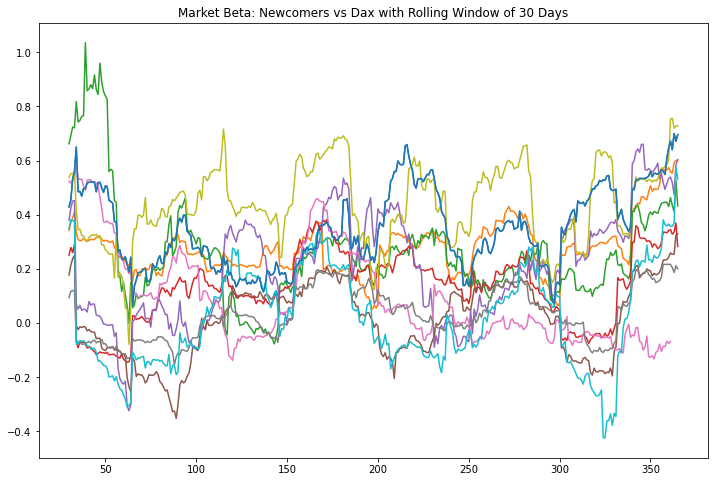

In [ ]:
# final_df.index = zal.index
plt.figure(figsize=(12,8))
for beta in final_df:
    final_df[beta].plot.line()
    plt.title("Market Beta: Newcomers vs Dax with Rolling Window of 30 Days")